<a href="https://colab.research.google.com/github/delicate99/Bioinformatics/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
# ID NC_045512.2
# https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta&log$=seqview

In [86]:
pip install biopython

## Outline
+ Reading
+ Sequence analysis
+ Freq N,AA,GC,AT content
+ Protein Synthesis








In [87]:
from Bio import SeqIO

In [88]:
# reading our faste file
covid_record =SeqIO.read("/content/drive/MyDrive/Bioinfo/covid19_sequence_NC_045512_2.fasta","fasta")

In [89]:
covid_record

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [90]:
# Sequence
covid_dna=covid_record.seq

In [91]:
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [92]:
len(covid_dna)

29903

In [93]:
# translation
# DNA to mRNA
covid_mrna=covid_dna.transcribe()

In [94]:
covid_mrna

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

In [95]:
#Translation (mRNA to Protein)
covid_protein =covid_mrna.translate()

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [96]:
# covid_protein with AA
covid_protein

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

## Sequence Analysis
+ freq of N Bases and Amino Acid
###Check for the N or bases

In [97]:
from collections import Counter

In [98]:
#Freq
covid_ncount=Counter(covid_dna)

In [99]:
covid_ncount

Counter({'A': 8954, 'C': 5492, 'G': 5863, 'T': 9594})

In [100]:
# plot
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

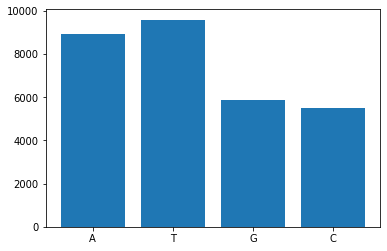

In [101]:
plt.bar(covid_ncount.keys(), covid_ncount.values())

In [102]:
#Moleculat weight
from Bio.SeqUtils import molecular_weight

In [103]:
# if the dna have "N" - covid_dna.strip("N")
# str(covid_dna).replae("N",'')
molecular_weight(covid_dna)

9241219.214400413

In [104]:
'N'in covid_dna.strip('N')

False

## DNA Composition
+ GC contents
+ AC contents

In [105]:
from Bio.SeqUtils import GC,GC123,GC_skew

In [106]:
GC(covid_dna)

37.97277865097148

In [107]:
def at_content(seq):
    result=float(seq.count('A')+seq.count('T'))/len(seq)*100
    return result

In [108]:
at_content(covid_dna)

62.02722134902853

In [109]:
# GC skew
# Lagging or leading strans
#GC_skew(covid_dna)

In [110]:
from Bio.SeqUtils import MeltingTemp as mt

In [111]:
mt.Tm_GC(covid_dna, strict=False)

75.20366663587967

In [112]:
# Number of Amino Acids
covid_pr_feq=Counter(covid_protein)

<BarContainer object of 21 artists>

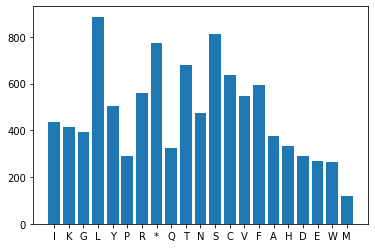

In [113]:
plt.bar(covid_pr_feq.keys(), covid_pr_feq.values())

In [114]:
Counter(covid_protein).most_common(5)

[('L', 886), ('S', 810), ('*', 774), ('T', 679), ('C', 635)]

In [115]:
# Longest seq AA before stop coden
covid_clean=covid_protein.split("*")

In [116]:
covid_clean=[str(i) for i in covid_clean]

In [117]:
covid_clean

['IKGLYLPR',
 'QTNQLSISCRSVL',
 'TNFKICVAVTRLHA',
 'CTHAV',
 'LITNYCR',
 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER',
 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS',
 'RWHLWLSRS',
 'KRRFAST',
 'TALCVHQTFGCSNCTSWSCYG',
 'AGSRTRRHSVRS',
 'W',
 'DTWCPCPSCGRNTSGLPQGSSS',
 'ER',
 '',
 'RSWWP',
 'LRRRSKVI',
 'LRRRAWH',
 'SL',
 'RFSRKLEH',
 'T',
 'QWCYP',
 'THA',
 'A',
 'RRGIHSLCR',
 'QLLWP',
 'WLPS',
 'VH',
 'RPSSTCW',
 'SFMHFVRTTGLY',
 'H',
 'EGCILLP',
 'T',
 'A',
 'NCLVHGTF',
 'KEL',
 'IADTF',
 'N',
 'IGKEI',
 'HLQWGMSKFCISLKFHNQDYSTKG',
 'KEKA',
 'WLYG',
 'NSICLSSCVTK',
 'MQPNVPFNSHEV',
 'SLW',
 'NFMADGRFC',
 'SHLRILWH',
 'EFD',
 'RRCHYLWLLTPKCCC',
 'NLLSSMSQFRSRT',
 'A',
 'SCRIP',
 '',
 'IWLENHSS',
 'GWSHYCLWRLCVLLCWLP',
 'QVCLLGSTC',
 'R',
 'HRL',
 'PYRCCWRRFRRS',
 '',
 'QPS',
 'NTPKRESQHQYCW',
 'L',
 'T',
 '',
 'RDRHYFGIFFCFHKCFCGNCERFGL',
 'SIQTNC',
 'ILW',
 'F',
 'SYKRKS',
 'KRCLEYW',
 'TEINTESSLCICIRGCSCCTINFLPHS',
 'NCSKFCACFTEGRYNNTRWNFTVFTETH',
 'CYDVHI',
 'FGY',
 'QSSCNGLHYRWCCSVDF

In [118]:
import pandas as pd

In [119]:
df = pd.DataFrame({'amino_acids':covid_clean})

In [120]:
df['count']=df['amino_acids'].str.len()

In [121]:
df.head()

,amino_acids,count
0,IKGLYLPR,8
1,QTNQLSISCRSVL,13
2,TNFKICVAVTRLHA,14
3,CTHAV,5
4,LITNYCR,7


In [122]:
df.nlargest(10,'count')

,amino_acids,count
548,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
694,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
719,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
695,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
718,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
6,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
464,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46
539,DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS,43
758,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43
771,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43
